# MULTIPLE LINEAR REGRESSION
Multiple linear regression (MLR) is a supervised learning algorithm for finding the existence of an
association relationship between a dependent variable (aka response variable or outcome variable) and
several independent variables (aka explanatory variables or predictor variable or features).

The functional form of MLR is given by

<img src="q.png" />


The regression coefficients b 1 , b 2 , ... , b k are called partial regression coefficients since the relationship
between an explanatory variable and the response (outcome) variable is calculated after removing (or
controlling) the effect all the other explanatory variables (features) in the model.
The assumptions that are made in multiple linear regression model are as follows:
1. The regression model is linear in regression parameters (b-values).
2. The residuals follow a normal distribution and the expected value (mean) of the residuals is zero.
3. In time series data, residuals are assumed to uncorrelated.
4. The variance of the residuals is constant for all values of X i . When the variance of the residuals is constant for different values of X i , it is called homoscedasticity. A non-constant variance of residuals is called heteroscedasticity.
5. There is no high correlation between independent variables in the model (called multi-collinearity). Multi-collinearity can destabilize the model and can result in an incorrect estimation of the regression parameters.

The partial regressions coefficients are estimated by minimizing the sum of squared errors (SSE). We will
explain the multiple linear regression model by using the example of auction pricing of players in the
Indian premier league (IPL).

### Predicting the SOLD PRICE (Auction Price) of Players
The Indian Premier League (IPL) is a professional league for Twenty20 (T20) cricket championships that
was started in 2008 in India. IPL was initiated by the BCCI with eight franchises comprising players from
across the world. 

The first IPL auction was held in 2008 for ownership of the teams for 10 years, with
a base price of USD 50 million. The franchises acquire players through an English auction that is conducted every year. However, there are several rules imposed by the IPL. For example, only international
players and popular Indian players are auctioned.


The performance of the players could be measured through several metrics. Although the IPL follows the Twenty20 format of the game, it is possible that the performance of the players in the other
formats of the game such as Test and One-Day matches could influence player pricing. 

A few players
had excellent records in Test matches, but their records in Twenty20 matches were not very impressive.
The performances of 130 players who played in at least one season of the IPL (2008−2011) measured
through various performance metrics are provided in Table

<img src="w.png" />
<img src="e.png" />

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

In [2]:
df = pd.read_csv('IPL IMB381IPL2013.csv')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

We can build a model to understand what features of players are influencing their SOLD PRICE or
predict the player’s auction prices in future. However, all columns are not features. For example, Sl. NO. is just a serial number and cannot be considered a feature of the player. We will build a model using only
player’s statistics. 

So, BASE PRICE can also be removed. We will create a variable X_feature which will
contain the list of features that we will finally use for building the model and ignore rest of the columns
of the DataFrame. 


The following function is used for including the features in the model building.


In [4]:
xfeatures = df.columns
xfeatures

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

Most of the features in the dataset are numerical (ratio scale) whereas features such as AGE, COUNTRY,
PLAYING ROLE, CAPTAINCY EXP are categorical and hence need to be encoded before building the
model. 

Categorical variables cannot be directly included in the regression model, and they must be
encoded using dummy variables before incorporating in the model building.


In [5]:
xfeatures = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

### Encoding Categorical Features
Qualitative variables or categorical variables need to be encoded using dummy variables before incorporating
them in the regression model. 


Finding unique values of column PLAYING ROLE shows the values: Allrounder, Bowler, Batsman,
W. Keeper. 

The following Python code is used to encode a categorical or qualitative variable using dummy
variables:

In [6]:
df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

The variable can be converted into four dummy variables. Set the variable value to 1 to indicate the role
of the player. 

This can be done using pd.get_dummies() method. We will create dummy variables for only
PLAYING ROLE to understand and then create dummy variables for the rest of the categorical variables.

In [7]:
pd.get_dummies(df['PLAYING ROLE'])[:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


the pd.get_dummies() method has created four dummy variables and has
already set the variables to 1 as variable value in each sample.

Whenever we have n levels (or categories) for a qualitative variable (categorical variable), we will use
(n − 1) dummy variables, where each dummy variable is a binary variable used for representing whether
an observation belongs to a category or not. 

The reason why we create only (n − 1) dummy variables
is that inclusion of dummy variables for all categories and the constant in the regression equation will
create perfect multi-collinearity . 

To drop one category, the parameter drop_ first
should be set to True.


We must create dummy variables for all categorical (qualitative) variables present in the dataset.

In [8]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

encoded_df = pd.get_dummies(df[xfeatures], 
                            columns=categorical_features, 
                            drop_first=True)

encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [9]:
xfeatures = encoded_df.columns

In [10]:
encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X = sm.add_constant(encoded_df)

Y = df['SOLD PRICE']

xtrain, xtest, ytrain, ytest = train_test_split(X, 
                                                Y, 
                                                train_size=0.8, 
                                                random_state=42)

### Building the Model on the Training Dataset
We will build the MLR model using the training dataset and analyze the model summary. The summary
provides details of the model accuracy, feature significance, and signs of any multi-collinearity effect.

In [12]:
model1 = sm.OLS(ytrain, xtrain).fit()

model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2022-05-16 21:05        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

As per the p-value (<0.05), only the features
HS, AGE_2, AVE and COUNTRY_ENG have come out significant. 

The model says that none of the other
features are influencing SOLD PRICE (at a significance value of 0.05). This is not very intuitive and could
be a result of multi-collinearity effect of variables.

### Multi-Collinearity and Handling Multi-Collinearity
When the dataset has a large number of independent variables (features), it is possible that few of these
independent variables (features) may be highly correlated. 

The existence of a high correlation between
independent variables is called multi-collinearity. 

Presence of multi-collinearity can destabilize the multiple linear regression model. Thus, it is necessary to identify the presence of multi-collinearity.


Multi-collinearity can have the following impact on the model:
1. The standard error of estimate, S e ( b ) , is inflated.
2. A statistically significant explanatory variable may be labelled as statistically insignificant due to the large p-value. This is because when the standard error of estimate is inflated, it results in an underestimation of t-statistic value.
3. The sign of the regression coefficient may be different, that is, instead of negative value for regression coefficient, we may have a positive regression coefficient and vice versa.
4. Adding/removing a variable or even an observation may result in large variation in regression coefficient estimates

### Variance Inflation Factor (VIF)
Variance Inflation Factor (VIF) is a measure used for identifying the existence of multi-collinearity. 

For
example, consider two independent variables X 1 and X 2 and regression between them.

<img src="ee.png" />

Let R 12 be the R-squared value of this model. Then the VIF, which is a measure of multi-collinearity, is
given by

<img src="rr.png" />

under root of (VIF) is the value by which the t-statistic value is flatten. VIF value of greater than 4 requires further
investigation to assess the impact of multi-collinearity. One approach to eliminate multi-collinearity is
to remove one of the variables from the model building.


variance_inflation_factor() method available in statsmodels.stats.outliers_influence package can be
used to calculate VIF for the features. 

The following method is written to calculate VIF and assign the
VIF to the columns and return a DataFrame:

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_score(X):
    
    xmatrix = X.values
    vif = [variance_inflation_factor(xmatrix, i) for i in range(xmatrix.shape[1])]
    
    vif_factor = pd.DataFrame()
    vif_factor['Column'] = X.columns
    vif_factor['VIF'] = vif
    
    return vif_factor    

Now, calling the above method with the X features will return the VIF for the corresponding features.

In [14]:
vif_factor = get_vif_score(X[xfeatures])
vif_factor

,Column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


Checking Correlation of Columns with Large VIFs
We can generate a correlation heatmap to understand the correlation between the independent variables
which can be used to decide which features to include in the model. 

We will first select the features that
have VIF value of more than 4.

In [16]:
columns_with_large_vif = vif_factor[vif_factor.VIF > 4].Column

In [17]:
X[columns_with_large_vif].corr()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,COUNTRY_IND,PLAYING ROLE_Batsman,CAPTAINCY EXP_1
T-RUNS,1.000000,0.026285,0.892823,0.231411,0.045505,0.067700,0.410143,0.411209,0.374046,0.114298,0.216571,-0.253083,-0.277157,-0.298999,-0.329022,-0.309105,-0.266649,-0.179278,0.384422,0.690647
T-WKTS,0.026285,1.000000,-0.088276,0.012052,0.822940,0.060641,-0.218544,-0.268432,-0.265540,-0.147752,-0.198036,0.297302,0.289735,0.162456,0.117530,0.205208,-0.178391,-0.147490,-0.276450,0.088782
ODI-RUNS-S,0.892823,-0.088276,1.000000,0.319264,0.056554,0.126795,0.523955,0.495765,0.446280,0.194111,0.376012,-0.268950,-0.302745,-0.225109,-0.249795,-0.237517,-0.242422,-0.168224,0.367995,0.714058
ODI-SR-B,0.231411,0.012052,0.319264,1.000000,0.160114,0.284584,0.306338,0.360086,0.340327,0.375371,0.320041,0.004855,-0.022502,0.018958,-0.019067,0.017522,-0.011977,-0.168609,0.083485,0.291373
ODI-WKTS,0.045505,0.822940,0.056554,0.160114,1.000000,0.124361,-0.198101,-0.209109,-0.222062,-0.030404,-0.148722,0.327122,0.302466,0.217302,0.230221,0.259800,-0.125708,-0.187669,-0.358824,0.077536
ODI-SR-BL,0.067700,0.060641,0.126795,0.284584,0.124361,1.000000,-0.027772,-0.067615,-0.053766,-0.051684,-0.033616,0.196887,0.151594,0.416627,0.313295,0.402495,-0.133908,-0.022494,-0.014689,0.103315
RUNS-S,0.410143,-0.218544,0.523955,0.306338,-0.198101,-0.027772,1.000000,0.834631,0.767023,0.380022,0.866213,-0.160762,-0.220959,-0.101818,-0.179459,-0.118567,-0.085762,0.209292,0.418555,0.352422
HS,0.411209,-0.268432,0.495765,0.360086,-0.209109,-0.067615,0.834631,1.000000,0.876249,0.531028,0.788439,-0.235327,-0.291494,-0.176049,-0.254494,-0.192990,-0.022883,-0.034029,0.408826,0.392749
AVE,0.374046,-0.265540,0.446280,0.340327,-0.222062,-0.053766,0.767023,0.876249,1.000000,0.583579,0.705365,-0.278482,-0.343958,-0.120430,-0.202301,-0.140809,0.031758,-0.037809,0.432485,0.378271
SR-B,0.114298,-0.147752,0.194111,0.375371,-0.030404,-0.051684,0.380022,0.531028,0.583579,1.000000,0.425394,-0.063179,-0.069823,-0.057895,-0.076228,-0.068248,0.181181,-0.049031,0.157903,0.176919


Text(0.5, 1, 'Correlation between Features')

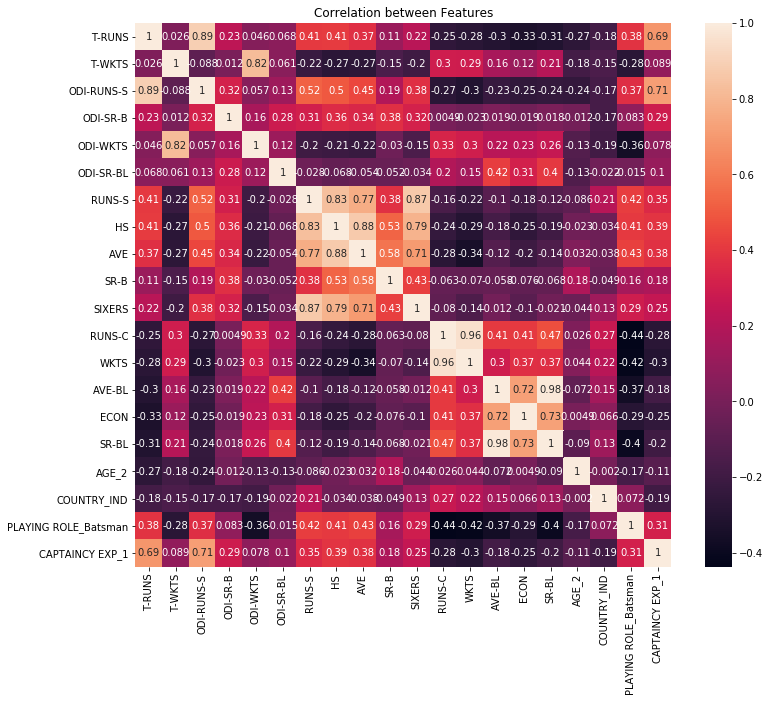

In [18]:
# correlation matrix

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,10))

sn.heatmap(X[columns_with_large_vif].corr(), annot=True)

plt.title("Correlation between Features")

#### Observations
1. T-RUNS and ODI-RUNS-S are highly correlated, whereas ODI-WKTS and T-WKTS are highly correlated.
2. Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, while bowler’s features like AVE-BL, ECON and SR-BL are highly correlated.


To avoid multi-collinearity, we can keep only one column from each group of highly correlated variables
and remove the others. 

Now which one to keep and which one to remove depends on the understanding
of the data and the domain.


We have decided to remove the following features. Please note that it may take multiple iterations
before deciding at a final set of variables, which do not have multi-collinearity. 

These iterations have been
omitted here for simplicity.

In [19]:
columns_to_be_removed = [
    'T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B',
    'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'
]

xnewfeatures = list( set(xfeatures) - set(columns_to_be_removed) )

get_vif_score(X[xnewfeatures])

,Column,VIF
0,WKTS,2.883101
1,COUNTRY_IND,3.144668
2,COUNTRY_ENG,1.131869
3,COUNTRY_ZIM,1.205305
4,PLAYING ROLE_Batsman,2.680207
5,ODI-WKTS,2.742889
6,COUNTRY_SA,1.416657
7,SIXERS,2.397409
8,ODI-SR-BL,2.822148
9,PLAYING ROLE_W. Keeper,1.900941


The VIFs on the final set of variables indicate that there is no multi-collinearity present any more
(VIF values are less than 4). 

We can proceed to build the model with these set of variables now.

### Building a New Model after Removing Multi-collinearity

In [20]:
xtrain = xtrain[xnewfeatures]

model2 = sm.OLS(ytrain, xtrain).fit()

model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-05-16 21:35   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

The p-values of the coefficients estimated show whether the variables are statistically significant in influencing response variables or not. If the p-value is less than the significance value (a) then the
feature is statistically significant, otherwise it is not. 

The value of a is usually selected as 0.05; however, it
may be chosen based on the context of the problem.


Based on the p-values, only the variables COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY
EXP_1 have come out statistically significant. So, the features that decide the SOLD PRICE are

1. Whether the players belong to India or England (that is, origin country of the player).
2. How many sixes has the player hit in previous versions of the IPL? How many wickets have been taken by the player in ODIs?
3. Whether the player has any previous captaincy experience or not.

Let us create a new list called significant_vars to store the column names of significant variables and build
a new model

In [21]:
significant_variables = ['COUNTRY_IND','COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']

model2 = sm.OLS(ytrain, xtrain[significant_variables]).fit()

model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-05-16 21:39 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

The following inference can be derived from the latest model ipl_model_3 

1. All the variables are statistically significant, as p-value is less than 0.05%.
2. The overall model is significant as the p-value for the F-statistics is also less than 0.05%.
3. The model can explain 71.5% of the variance in SOLD PRICE as the R-squared value is 0.715 and the adjusted R-squared value is 0.704%. Adjusted R-squared is a measure that is calculated after normalizing SSE and SST with the corresponding degrees of freedom.